In [1]:
import numpy as np
import matplotlib.pyplot as plt

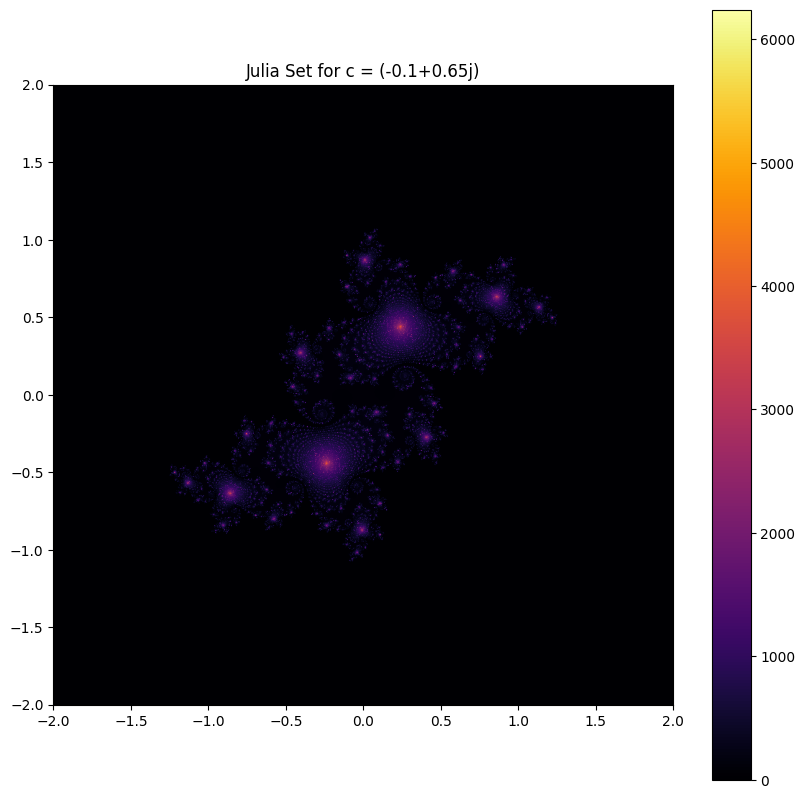

In [2]:
# This is for the first part of Exercise a
def julia_set(c, bounds, max_iterations, resolution):

    # generate the grid points (Z)
    x = np.linspace(bounds[0], bounds[1], resolution)
    y = np.linspace(bounds[2], bounds[3], resolution)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y # Convert the coordinates into complex numbers -> z = x + iy

    # initialize the image matrix
    img = np.zeros(Z.shape, dtype=float)


    # main part of the code, compute the formula
    #for i in range(max_iterations):
    for i in range(resolution):
        for j in range(resolution):
            z = Z[j, i]
            for k in range(max_iterations):
                if(abs(z) > 2):
                    break
                z = z**2 + c
            img[j, i] = k
    
    return img

c = -0.1 + 0.65j
bounds = [-2, 2, -2, 2]
julia_set = julia_set(c=c, bounds=bounds, max_iterations=10000, resolution=1000)

plt.figure(figsize=(10, 10))
plt.imshow(julia_set, extent=[-2, 2, -2, 2], cmap='inferno')
plt.colorbar()
plt.title(f"Julia Set for c = {c}")
plt.show()

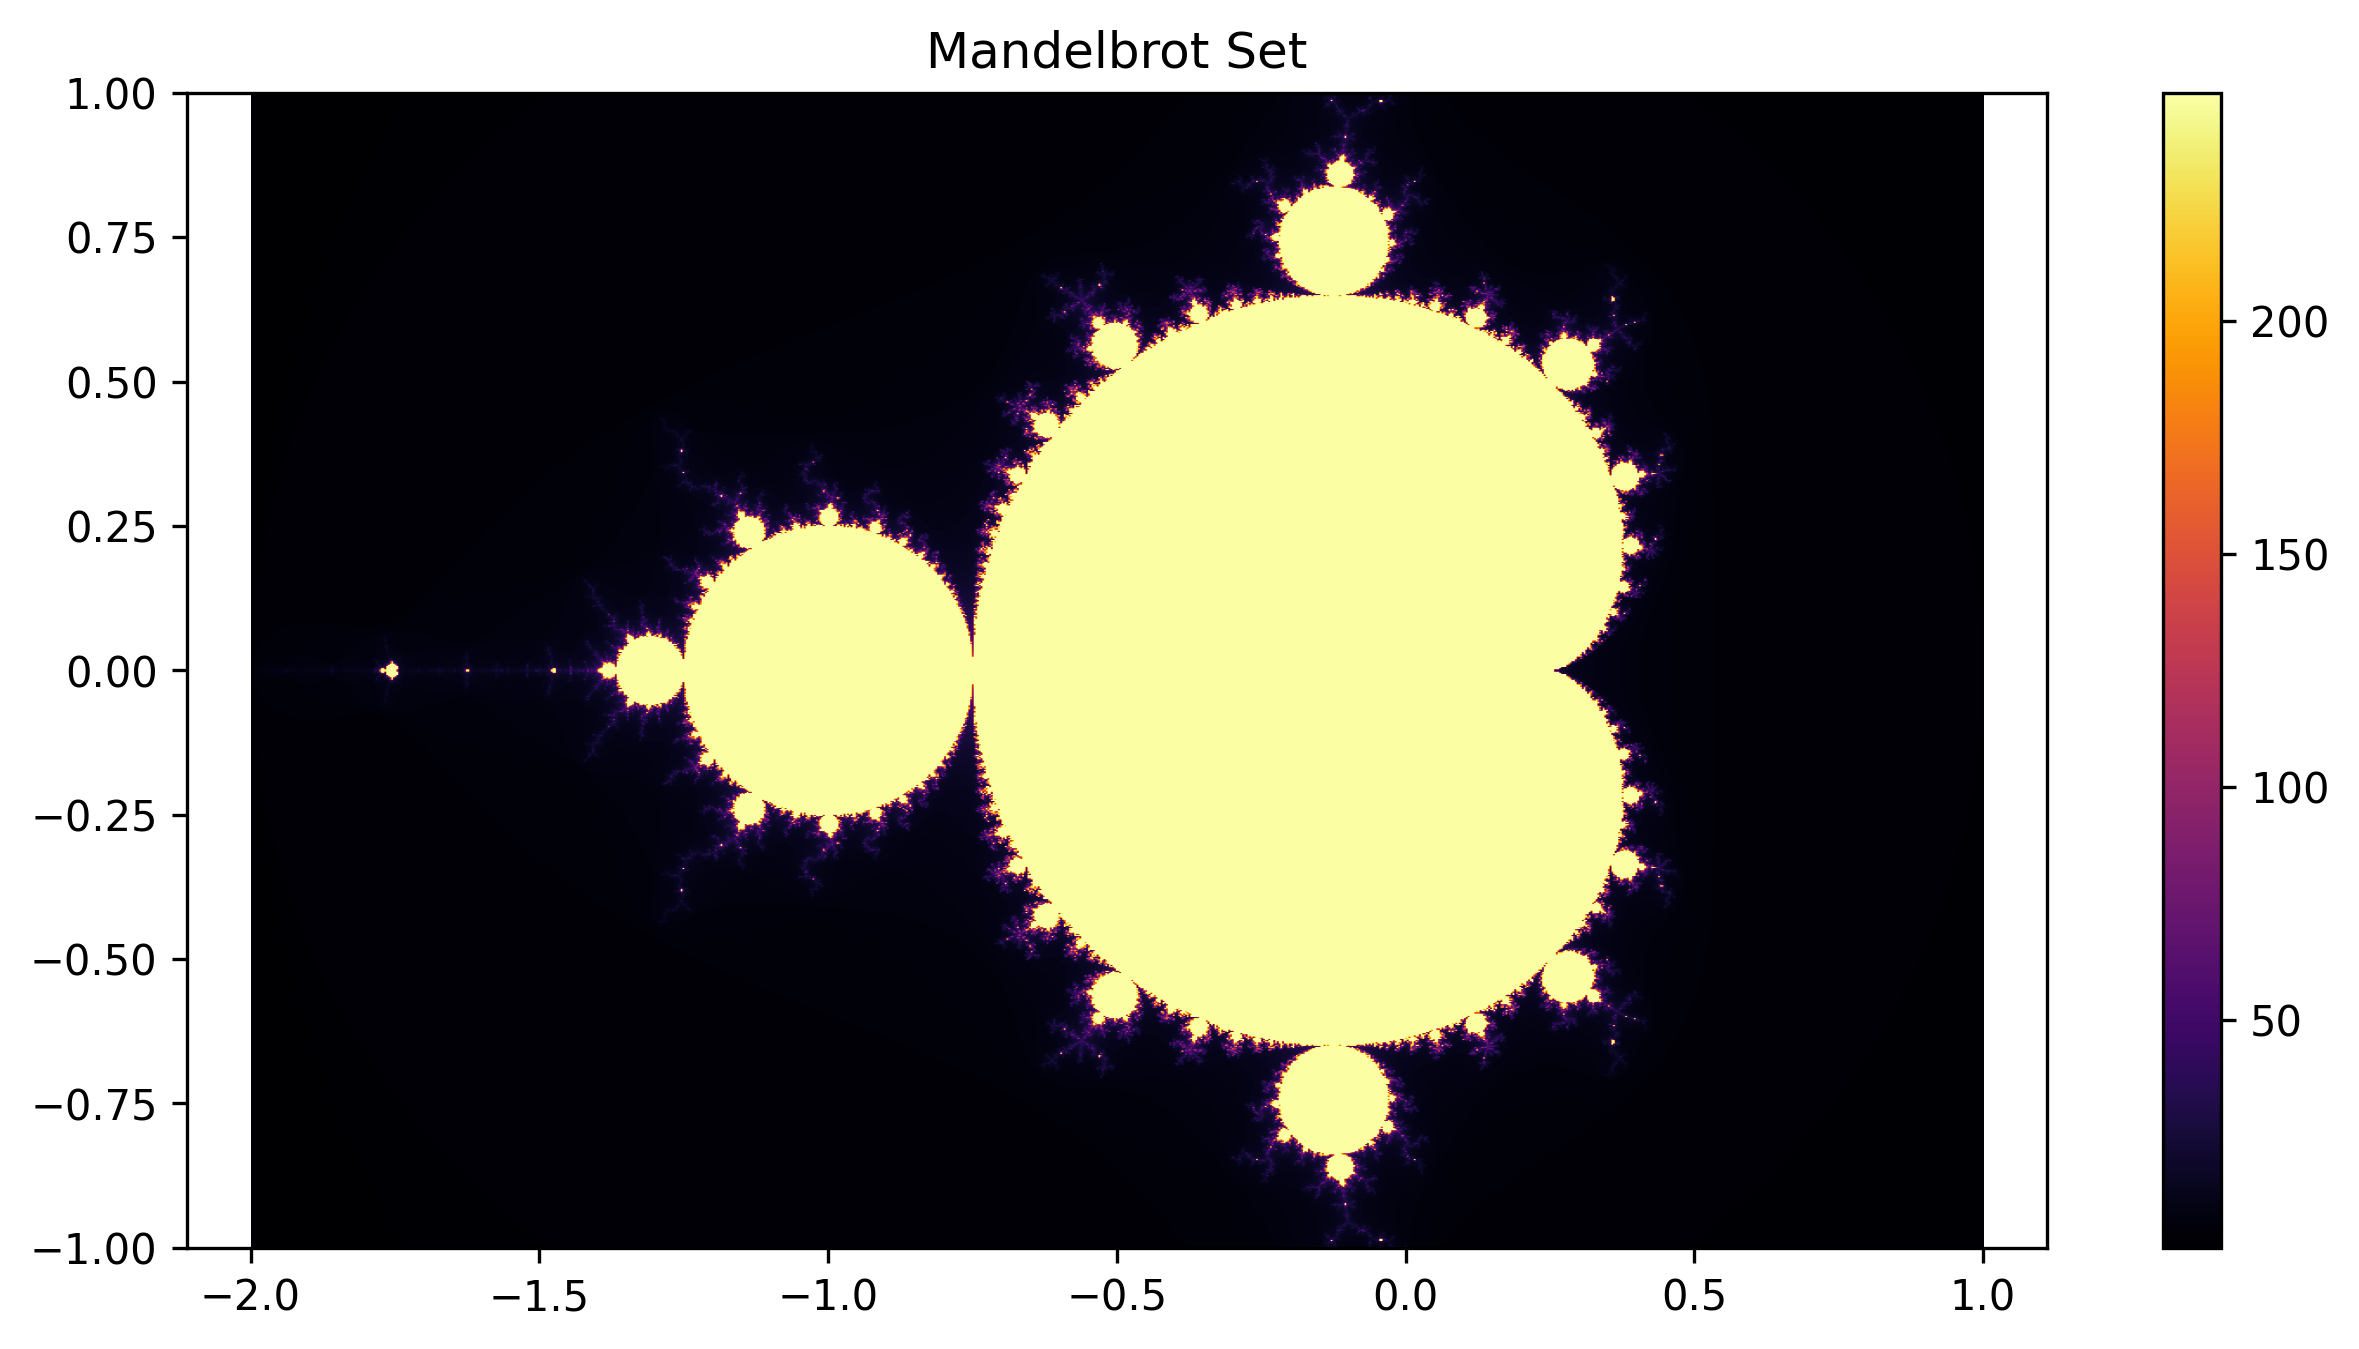

In [3]:
# This is for the second part of Exercise a
def mandelbrot_set(z=0, bounds=[-2,2,-2,2], max_iterations=250, resolution=1000):

    # generate the grid points (Z)
    x = np.linspace(bounds[0], bounds[1], resolution)
    y = np.linspace(bounds[2], bounds[3], resolution)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y # Convert the coordinates into complex numbers -> z = x + iy

    # initialize the image matrix
    img = np.zeros(Z.shape, dtype=float)


    # main part of the code, compute the formula
    #for i in range(max_iterations):
    for i in range(resolution):
        for j in range(resolution):
            z = 0
            c = Z[j, i]
            for k in range(max_iterations):
                if(abs(z) > 2):
                    break
                z = z**2 + c
            img[j, i] = k
    
    return img

bounds = [-2, 1, -1, 1]
julia_set = mandelbrot_set(bounds=bounds, max_iterations=250, resolution=1000)

plt.figure(figsize=(10, 5), dpi=300)
plt.imshow(julia_set, extent=bounds, cmap='inferno')
plt.colorbar()
plt.axis('equal')
plt.title(f"Mandelbrot Set")
plt.show()

To the Questions in the Exercise:

How does the phase plot look when starting close to the fixed point?
-> I think that the closer we go to the center, the rounder the phase plot gets.
How does it look when further from the fixed point? 
-> The further away we start from the fixed point, the more extreme the "triangle" gets
-> I would explain this due to the stronger growth of the foxed who eat a lot more mice and so on




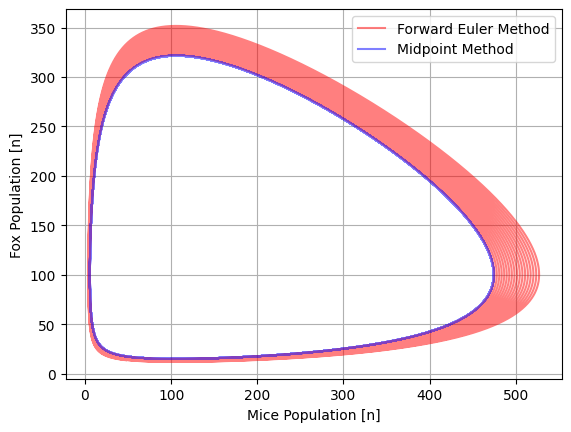

In [4]:
# This is for exercise 2

# definition of constants
k_m = 2
k_mf = 0.02
k_fm = 0.01
k_f = 1.06

def fox_mice(f, m):
    dfdt = -k_f * f + k_fm * f * m
    dmdt = k_m * m - k_mf * m * f 
    return dfdt, dmdt


# Definition of the forward euler method
def forward_euler(f0, m0, dt, steps):
    f = [f0]
    m = [m0]
    t = [0]

    for i in range(steps):
        dfdt, dmdt = fox_mice(f[i], m[i])
        f.append(f[i] + dfdt * dt)
        m.append(m[i] + dmdt * dt)
        t.append(t[i] + dt)
    
    return t,f,m


def midpoint(f0, m0, dt, steps):
    t, f, m = [0], [f0], [m0]

    for i in range(steps):
        dfdt1, dmdt1 = fox_mice(f[i], m[i])
        dfdt2, dmdt2 = fox_mice(f[i] + 0.5 * dfdt1 * dt, m[i] + 0.5 * dmdt1 * dt)

        f.append(f[i] + dfdt2 * dt)
        m.append(m[i] + dmdt2 * dt)
        t.append(t[i] + dt)
    
    return t, f, m


dt = 0.001
steps = 100000
f0 = 15
m0 = 100

t_euler, f_euler, m_euler = forward_euler(f0, m0, dt, steps)
t_midpoint, f_midpoint, m_midpoint = midpoint(f0, m0, dt, steps)

plt.plot(m_euler, f_euler, label="Forward Euler Method", alpha=0.5, color='red')
plt.plot(m_midpoint, f_midpoint, label="Midpoint Method", alpha=0.5, color='blue')
plt.xlabel("Mice Population [n]")
plt.ylabel("Fox Population [n]")
plt.grid(True)
plt.legend()


print("To the Questions in the Exercise:")
print("""
How does the phase plot look when starting close to the fixed point?
-> I think that the closer we go to the center, the rounder the phase plot gets.
How does it look when further from the fixed point? 
-> The further away we start from the fixed point, the more extreme the "triangle" gets
-> I would explain this due to the stronger growth of the foxed who eat a lot more mice and so on

""")